In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [142]:
data = pd.read_csv('Stores.csv')

In [143]:
data.set_index('Store ID ',inplace=True)

In [144]:
data

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620
...,...,...,...,...
892,1582,1910,1080,66390
893,1387,1663,850,82080
894,1200,1436,1060,76440


In [145]:
def func(x):
    if x<1000:
        return 0
    else:
        return int(x/1000)
temp = data['Store_Area'].apply(func)

In [146]:
#data['Store Area ind'] = temp


In [147]:
data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [148]:
#plt.subplot?

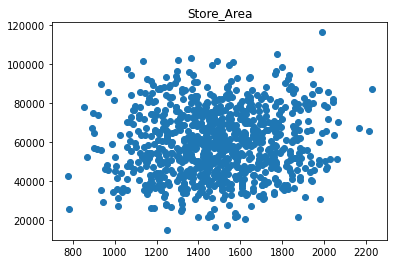

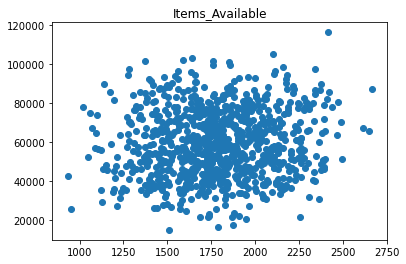

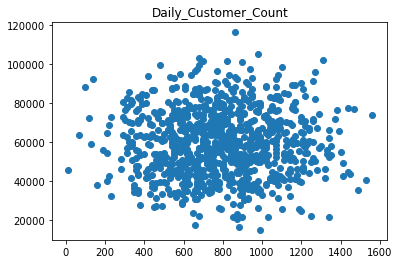

In [149]:
for i in data.columns[:-1]:
    plt.scatter(data[i], data['Store_Sales'])
    plt.title(i)
    plt.show()

<AxesSubplot:>

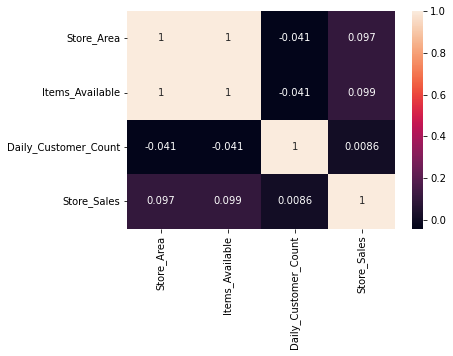

In [150]:
sns.heatmap(data.corr(), annot=True)

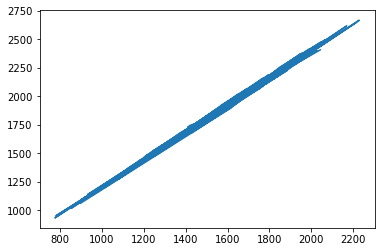

In [151]:
plt.plot(data['Store_Area'], data['Items_Available'])

In [152]:
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [153]:
scaler = StandardScaler()
for i in data.columns:
    data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))
data

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,0.694091,0.597135,-0.966481,0.415496
2,-0.097600,-0.100218,-2.172930,-1.136787
3,-0.581412,-0.577354,-0.250151,-0.310882
4,-0.137585,-0.113564,-0.627167,-0.327179
5,1.137919,1.097628,-1.268093,-0.741004
...,...,...,...,...
892,0.386211,0.426968,1.107104,0.409675
893,-0.393485,-0.397177,0.239969,1.322886
894,-1.141194,-1.154589,1.031701,0.994619


In [154]:

X = data.drop('Store_Sales',axis=1)
Y = data['Store_Sales']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)

In [155]:
l_reg = linear_model.LinearRegression()
mod_reg = l_reg.fit(x_train, y_train)
pred_reg = mod_reg.predict(x_test)

print('R^2 value: ', l_reg.score(X,Y))

R^2 value:  0.010296422156228724


In [156]:
sv_mod = svm.SVC()
sv_mod.fit(x_train, y_train)
sv_pred = sv_mod.predict(x_test)
acc = accuracy_score(y_test, sv_pred)
print('accuracy: ', acc)

ValueError: Unknown label type: 'continuous'

In [157]:
data['C']

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,0.694091,0.597135,-0.966481,0.415496
2,-0.097600,-0.100218,-2.172930,-1.136787
3,-0.581412,-0.577354,-0.250151,-0.310882
4,-0.137585,-0.113564,-0.627167,-0.327179
5,1.137919,1.097628,-1.268093,-0.741004
...,...,...,...,...
892,0.386211,0.426968,1.107104,0.409675
893,-0.393485,-0.397177,0.239969,1.322886
894,-1.141194,-1.154589,1.031701,0.994619
